# **THE TITANIC DATASET ANALYSIS**
## Goal
- Analyse the traits in which the survivors have, thus conclude a trend in selecting who to live
- Perform basic task: Clean through set of datas, handle with missing value, organize the columns in order for more clear analisation
- Write basic code to generate plots and deduce the patterns

## **STEP 1** UPLOAD THE DATA

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Read the Titanic dataset
titanic_filepath = r'C:\Users\X1 Carbon\Downloads\train.csv'
titanic_data = pd.read_csv(titanic_filepath, index_col='PassengerId')

In [ ]:
#Show basic information about the dataset
titanic_data.info()
titanic_data.describe()
titanic_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **STEP 2** CLEAN THE DATA

In [ ]:

titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.drop(columns=['SibSp', 'Parch'], inplace=True)
titanic_data['HaveCabin'] = titanic_data['Cabin'].isna().astype(int)
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Embarked'].fillna(method = 'ffill', inplace=True)
#Turn sex column into binary
titanic_data['Sex'] = np.where(titanic_data['Sex']=='male', 1, 0)
titanic_data['Fare'] = titanic_data['Fare'].round(2)
titanic_data['Age'] = titanic_data['Age'].astype(int)


C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_21040\1501330215.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(method = 'ffill', inplace=True)
C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_21040\1501330215.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_data['Embarked'].fillna(method = 'ffill', inplace=True)


In [116]:
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    int64  
 4   Age        891 non-null    int64  
 5   Ticket     891 non-null    object 
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   GoWith     891 non-null    int64  
 9   HaveCabin  891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 76.6+ KB


,Survived,Pclass,Sex,Age,Fare,GoWith,HaveCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332,32.204366,0.904602,0.771044
std,0.486592,0.836071,0.477990,13.013778,49.693414,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,14.450000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.330000,10.000000,1.000000


- The titanic has a total of 891 passengers, with only 30% of the person in the ship survived the incident
- Most of the people on the ship is around 30 years old, mostly go alone

## **STEP 3** ANALYZE THE DATA

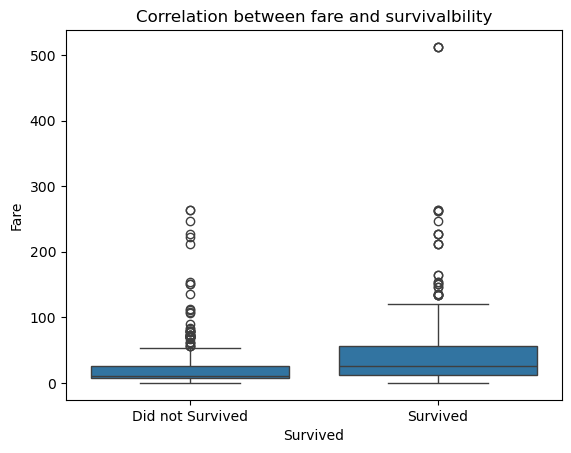

In [ ]:
sns.boxplot(data=titanic_data, x= 'Survived', y = 'Fare')
plt.title('Correlation between fare and survivalbility')
plt.xticks([0,1], ['Did not Survived', 'Survived'])
plt.show()
#Comment: Seems like the person with the highest amount of money would be saved

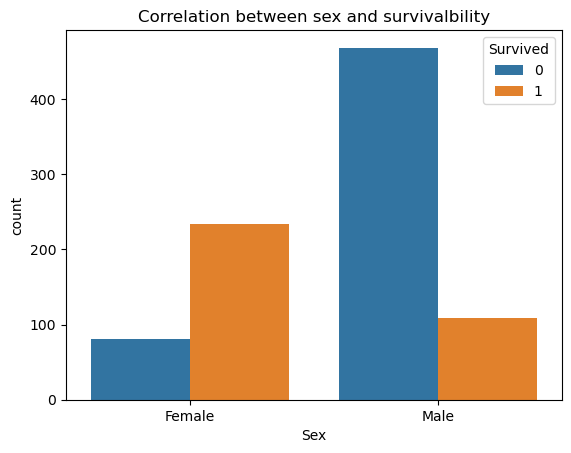

In [ ]:
sns.countplot(data=titanic_data, x = 'Sex', hue='Survived')
plt.title('Correlation between sex and survivalbility')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()
#Comment: Female has more chance to survive than male

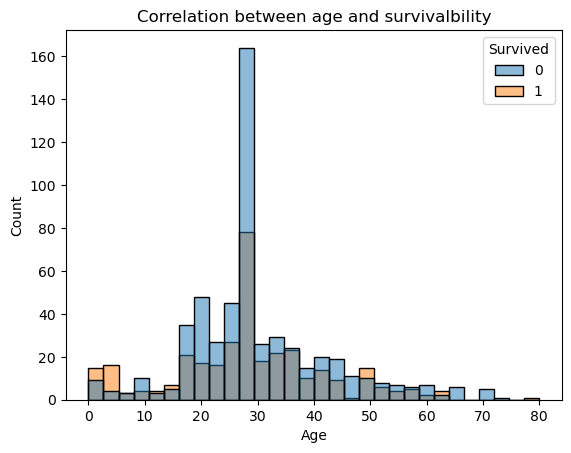

In [170]:
sns.histplot(data=titanic_data, x = 'Age', hue = 'Survived')
plt.title('Correlation between age and survivalbility')
plt.show()
#Comment: Most of the children under 5 years old would be prioritise to be saved

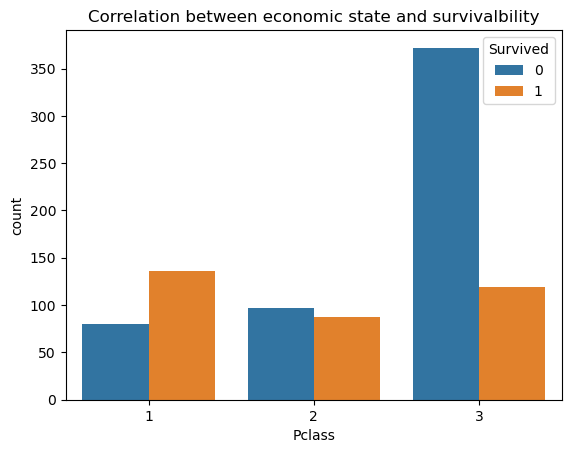

Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

In [184]:
def showing_percent(number):
    number = str(number*100) + '%'
    return number
sns.countplot(data=titanic_data, x='Pclass', hue = 'Survived')
plt.title('Correlation between economic state and survivalbility')
plt.show()
Pclass_Survival = titanic_data.groupby('Pclass')['Survived'].mean().apply(lambda x:f'{x:.2%}')
Pclass_Survival
#The people in the higher pclass has more chance of surviving

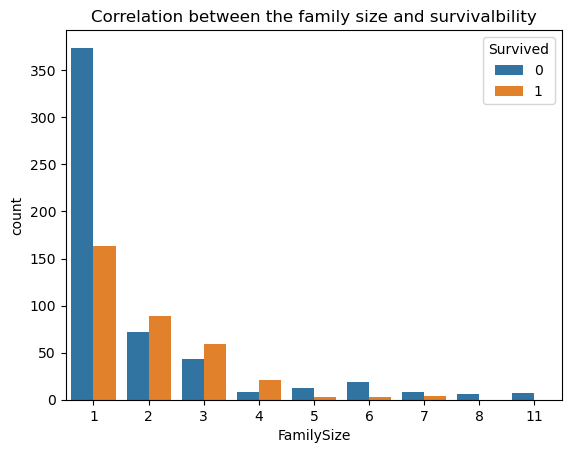

In [ ]:
sns.countplot(data=titanic_data, x='FamilySize', hue = 'Survived')
plt.title('Correlation between the family size and survivalbility')
plt.show()
#Comment: No clear sign of correlation when going alone, higher survival rate when going in a group of 2, 3 or 4, but soon drop quickly when have a higher number of family size

In [ ]:
Embarked_Survival = titanic_data.groupby('Embarked')['Survived'].agg(['sum','mean'])
Embarked_Survival['mean'] = Embarked_Survival['mean'].apply(lambda x: f"{x:.2%}")
Embarked_Survival
#Comment: People embarked on C got safe even more than the crowdest place (S)

,sum,mean
Embarked,,
C,94,55.62%
Q,31,39.74%
S,217,33.70%


## **CONCLUSION**
- People who embarked on C got more chance to survive
- Female has more chance to survive
- Children got save more proportionally to other age group
- The one who pay fare the most got safe
- People on Pclass 1 and 2 have more chance to be saved